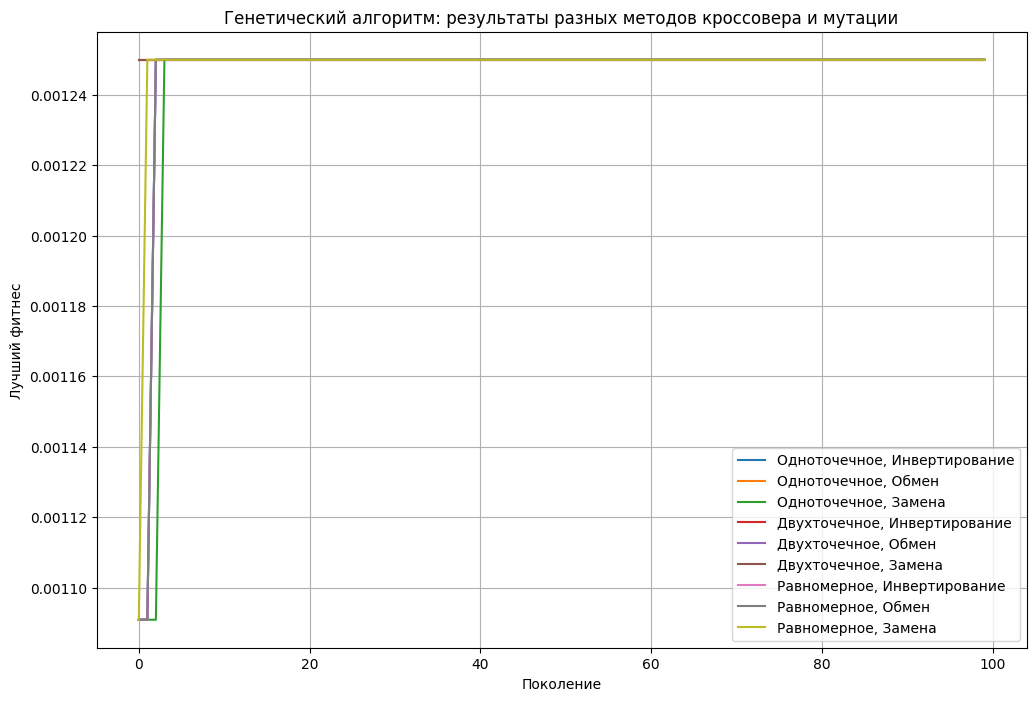

Лучшее решение (культуры для полей): [2 2 2 1 2]
Лучший фитнес (урожайность/стоимость): 0.0010908595063860733
Наилучший урожай: 24.0 т.
Наименьшая стоимость: 22000 руб.


In [16]:
#На языке Python разработайте скрипт, который с помощью генетического алгоритма и полного перебора решает следующую задачу.
# Дано N полей для и k культур для посева.
#  Для каждого поля известна характеристика урожайности каждой из k культур, а для каждой культуры – его закупочная стоимость.
#  Необходимо получить самый лучший урожай за наименьшую стоимость.
import numpy as np
import random
import matplotlib.pyplot as plt

# Задаем параметры
N = 5  # Количество полей
k = 3  # Количество культур

# Определяем урожайности и стоимости культур
crops = [
    {"name": "Пшеница", "yield": 3.0, "cost": 8000},  # Урожайность (т/га), Стоимость (руб/т)
    {"name": "Рис", "yield": 4.0, "cost": 6000},
    {"name": "Кукуруза", "yield": 5.0, "cost": 4000},
]

# Настройки генетического алгоритма
population_size = 100
generations = 100
crossover_rate = 0.9
mutation_rate = 0.1

# Функция для оценки приспособленности
def fitness(solution):
    total_yield = sum(crops[solution[i]]["yield"] for i in range(N))  # Сумма урожая всех культур на всех полях
    total_cost = sum(crops[solution[i]]["cost"] for i in range(N))    # Сумма стоимости всех культур на всех полях
    return total_yield / (total_cost + 1), total_yield, total_cost  # Возвращаем фитнес, урожай и стоимость

# Генерация начальной популяции
def initialize_population():
    return [np.random.randint(0, k, N) for _ in range(population_size)]

# Селекция
def selection(population):
    scores = [fitness(individual)[0] for individual in population]
    selected_indices = np.argsort(scores)[-population_size//2:]  # Берем половину лучших
    return [population[i] for i in selected_indices]

# Кроссовер: три метода
def single_point_crossover(parent1, parent2):
    point = random.randint(1, N-1)
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

def two_point_crossover(parent1, parent2):
    points = sorted(random.sample(range(1, N), 2))  # Два разных точки
    child1 = np.empty(N, dtype=int)
    child1[:points[0]] = parent1[:points[0]]
    child1[points[0]:points[1]] = parent2[points[0]:points[1]]
    child1[points[1]:] = parent1[points[1]:]
    
    child2 = np.empty(N, dtype=int)
    child2[:points[0]] = parent2[:points[0]]
    child2[points[0]:points[1]] = parent1[points[0]:points[1]]
    child2[points[1]:] = parent2[points[1]:]
    
    return child1, child2

def uniform_crossover(parent1, parent2):
    child1 = np.where(np.random.rand(N) > 0.5, parent1, parent2)
    child2 = np.where(np.random.rand(N) > 0.5, parent2, parent1)
    return child1, child2

# Мутация: три метода
def inversion_mutation(individual):
    start, end = sorted(random.sample(range(N), 2))  # Два разных индекса
    individual[start:end] = individual[start:end][::-1]  # Инвертируем участок
    return individual

def swap_mutation(individual):
    indices = random.sample(range(N), 2)  # Два разных индекса
    individual[indices[0]], individual[indices[1]] = individual[indices[1]], individual[indices[0]]
    return individual

def bit_flip_mutation(individual):
    index = random.randint(0, N-1)
    individual[index] = random.randint(0, k-1)  # Замена на случайную культуру
    return individual

# Генетический алгоритм
def genetic_algorithm(crossover_method, mutation_method):
    population = initialize_population()
    best_fitness_history = []

    for _ in range(generations):
        selected = selection(population)
        next_population = selected.copy()

        while len(next_population) < population_size:
            parent1, parent2 = random.sample(selected, 2)
            child1, child2 = crossover_method(parent1, parent2)
            next_population.append(mutation_method(child1))
            next_population.append(mutation_method(child2))

        population = next_population
        best_solution = max(population, key=lambda ind: fitness(ind)[0])
        best_fitness_history.append(fitness(best_solution))

    return best_fitness_history

# Основной код для экспериментов
crossover_methods = {
    "Одноточечное": single_point_crossover,
    "Двухточечное": two_point_crossover,
    "Равномерное": uniform_crossover,
}

mutation_methods = {
    "Инвертирование": inversion_mutation,
    "Обмен": swap_mutation,
    "Замена": bit_flip_mutation,
}

plt.figure(figsize=(12, 8))

# Проведение экспериментов
for crossover_name, crossover_func in crossover_methods.items():
    for mutation_name, mutation_func in mutation_methods.items():
        scores = genetic_algorithm(crossover_func, mutation_func)
        plt.plot([i[0] for i in scores], label=f"{crossover_name}, {mutation_name}")

plt.title("Генетический алгоритм: результаты разных методов кроссовера и мутации")
plt.xlabel("Поколение")
plt.ylabel("Лучший фитнес")
plt.legend()
plt.grid()
plt.show()

# Получаем лучшее решение
best_overall_solution = max(initialize_population(), key=lambda ind: fitness(ind)[0])
best_fitness, best_yield, best_cost = fitness(best_overall_solution)

print("Лучшее решение (культуры для полей):", best_overall_solution)
print("Лучший фитнес (урожайность/стоимость):", best_fitness)
print("Наилучший урожай:", best_yield, "т.")
print("Наименьшая стоимость:", best_cost, "руб.")
